In [23]:
import sys
sys.path.append('../src/')
sys.path.append('../gtm/')

import importlib
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
from sim_utils import *
from simulation import *

### lda

In [24]:
num_topics = 20
num_simulations = 5
doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 5000,
    "voc_size": 1000,
    }
model_type = "lda"
matching_by = "dot_product"

score_dict = {"cossim":[], "correlation":[],"keywords":[], "euclid":[]}

for i in range(num_simulations):
    s = Simulator(model_type=model_type,num_topics=num_topics)
    s.generate_docs(
        is_output=True,
        seed=i,
        doc_args=doc_args
        )
    s.estimate_distributions(
        is_output=True,
        )
    corres_num_topic_dict = matching_topic(
        model_type=model_type,
        matching_by=matching_by,
        )
    for score_type in score_dict.keys():
        score = calculate_score(
            model_type=model_type,
            score_type=score_type,
            corres_num_topic_dict=corres_num_topic_dict,
            )
        score_dict[score_type].append(score)

    print("date:{}".format(datetime.now()))
    print("finished {}th work".format(i+1))
    print("  ")

with open("../data/{}/score_dict_{}.pickle".format(model_type,num_simulations),"wb") as f:
    pickle.dump(score_dict,f)

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [01:11<00:00, 69.76it/s]


date:2023-07-14 17:57:58.495574
finished 1th work
  


100%|██████████| 5000/5000 [01:10<00:00, 70.46it/s]


date:2023-07-14 17:59:22.740488
finished 2th work
  


100%|██████████| 5000/5000 [01:11<00:00, 70.32it/s]


date:2023-07-14 18:00:47.364583
finished 3th work
  


100%|██████████| 5000/5000 [01:11<00:00, 70.40it/s]


date:2023-07-14 18:02:12.069675
finished 4th work
  


100%|██████████| 5000/5000 [01:10<00:00, 71.10it/s]


date:2023-07-14 18:03:35.681848
finished 5th work
  


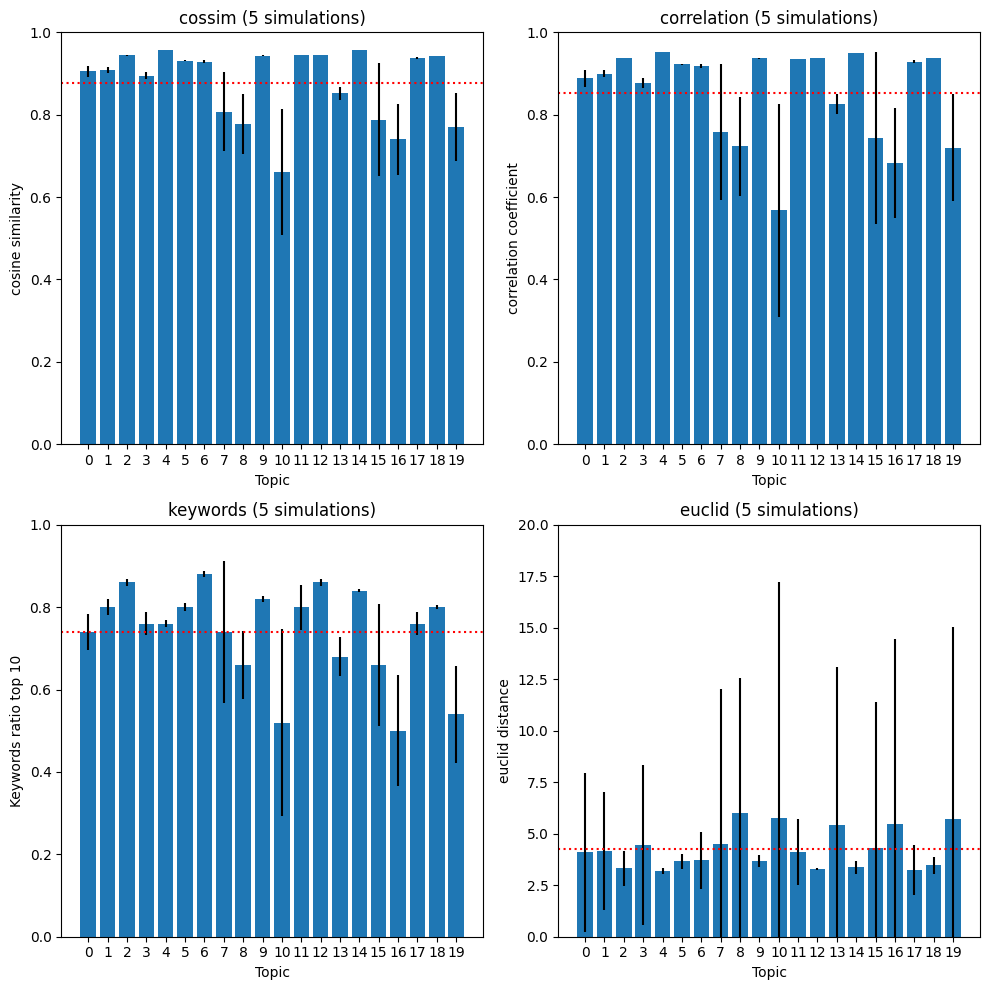

In [29]:
fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
ax1 = fig.add_subplot(2, 2, 1,xlabel="Topic", ylabel="cosine similarity")
ax2 = fig.add_subplot(2, 2, 2, xlabel="Topic", ylabel="correlation coefficient")
ax3 = fig.add_subplot(2, 2, 3, xlabel="Topic", ylabel="Keywords ratio top 10")
ax4 = fig.add_subplot(2, 2, 4, xlabel="Topic", ylabel="euclid distance")
score_type_list = ["cossim","correlation","keywords", "euclid"]
ax_list = [ax1,ax2,ax3,ax4]
for i,score_type in enumerate(score_type_list):
    df_score_res = pd.DataFrame(score_dict[score_type],columns=["Topic{}".format(i) for i in range(num_topics)])
    x = np.arange(num_topics)
    mean = df_score_res.mean()
    var = df_score_res.var()
    ax_list[i].bar(x, mean, yerr=var)
    ax_list[i].axhline(mean.mean(), color='r', linestyle='dotted')
    if i ==3:
        ax_list[i].set_ylim(0, 20)
    else:
        ax_list[i].set_ylim(0, 1)
    ax_list[i].set_xticks(range(num_topics))
    ax_list[i].set_title("{} ({} simulations)".format(score_type_list[i],num_simulations,))
    # plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()